<a href="https://colab.research.google.com/github/chumdan/Machine-Learning-Project/blob/main/%ED%9A%8C%EA%B7%80/%EB%AC%B8%EC%A0%9C6_%EC%A4%91%EA%B3%A0%EC%9E%90%EB%8F%99%EC%B0%A8_%EA%B0%80%EA%B2%A9%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 중고자동차 가격분석 (회귀문제유형)

### Step 0. 필요패키지 다운 및 데이터셋 준비

#### 필요패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier as LGBM
from sklearn.feature_selection import *
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'chumdan'
os.environ['KAGGLE_KEY'] = '0e8bf51ba50bce898a8a9736072bd3b8'

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.* # 재 실행할때 팁.(완전히 처음부터 시작하게 할 수 있음.)
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 97% 259M/267M [00:03<00:00, 78.1MB/s]
100% 267M/267M [00:03<00:00, 72.2MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


## 데이터 소개
    다음의 데이터를 사용한다.(크롤링데이터)
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도

    종속변수 : price 가격
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [ ]:
df = pd.read_csv('vehicles.csv')

### Step 1. 데이터 기초 통계 분석 및 그래프

#### 데이터프레임의 각 칼럼 분석

In [ ]:
# 데이터프레임에서 불필요한 컬럼 제거하기
# 'year' 컬럼을 'age' 컬럼으로 변경하기
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
df.describe() # 이상치 많은

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True)

In [ ]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [ ]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,7.0
458209,wausau,17895,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,3.0
458210,wyoming,17900,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,7.0
458211,wyoming,1300,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,13.0


#### 범주형 데이터의 통계 분석

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
len(df['manufacturer'].value_counts())

43

In [ ]:
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


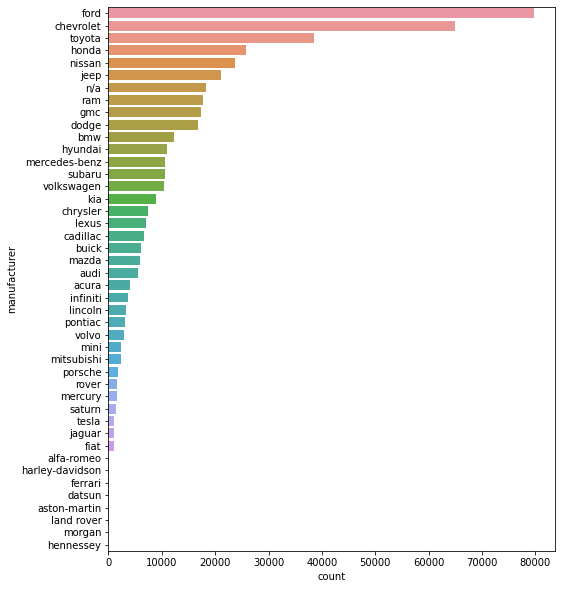

In [ ]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

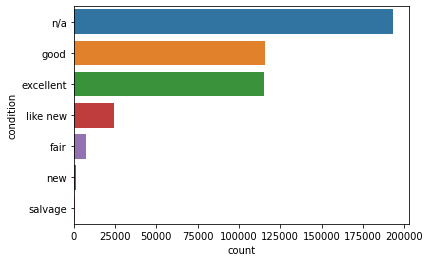

In [ ]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

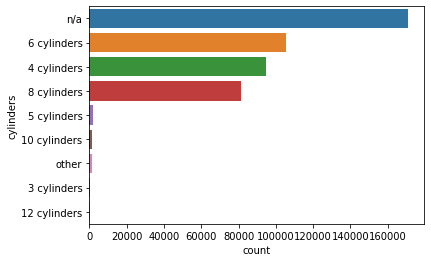

In [ ]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

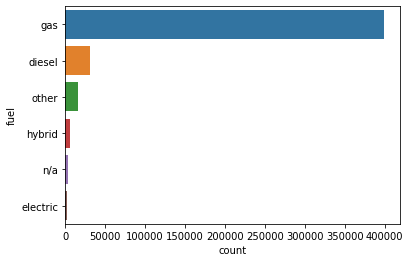

In [ ]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

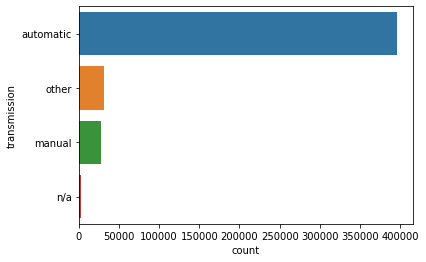

In [ ]:
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

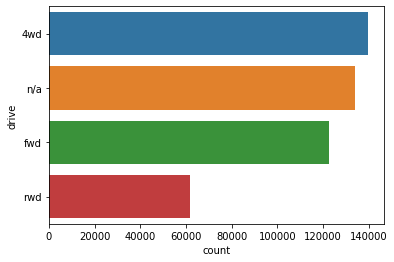

In [ ]:
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

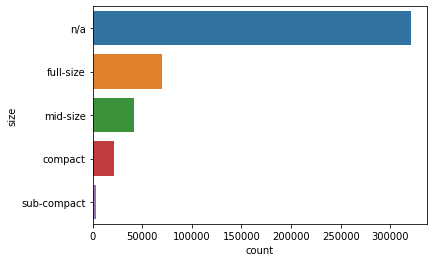

In [ ]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

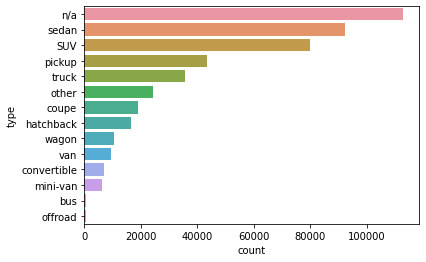

In [ ]:
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

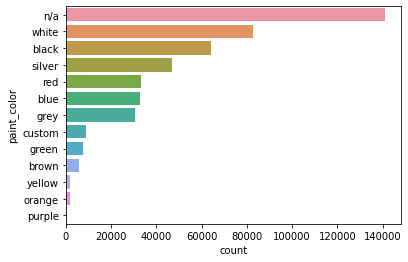

In [ ]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

#### 수치형 데이터 통계분석

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

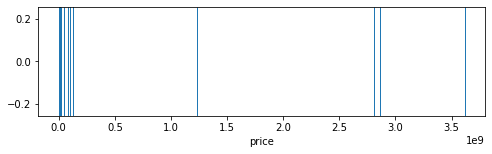

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

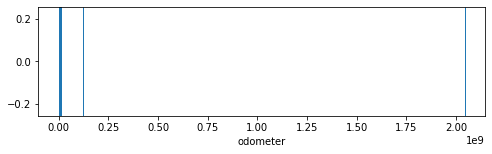

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

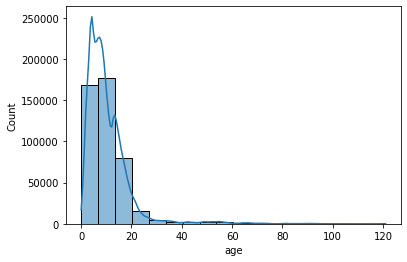

In [ ]:
sns.histplot(x='age', data=df, bins=18, kde=True)

#### 데이터 클리닝 수행

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

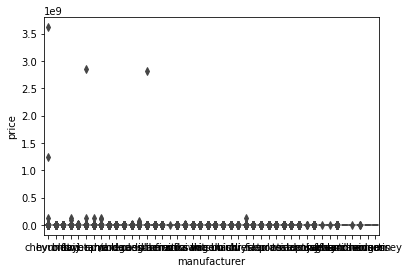

In [ ]:
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

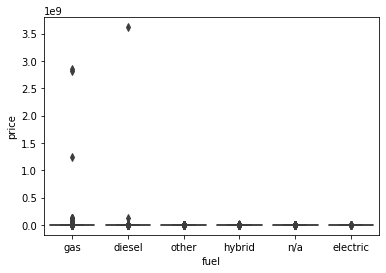

In [ ]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

In [ ]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정하여 채워넣기)
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
df.drop('title_status', axis=1, inplace=True)

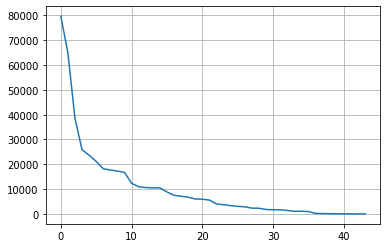

In [ ]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 12
others = counts.index[n_categorical:] 
# 12개에 속해 있으면, others 아니면, 그냥 그대로 index 유지.
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

others       111065
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
bmw           12352
hyundai       10975
Name: manufacturer, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

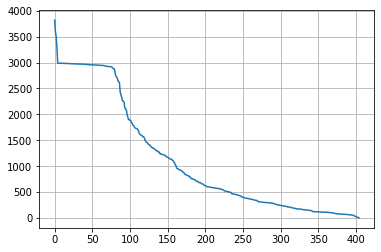

In [ ]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 5
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

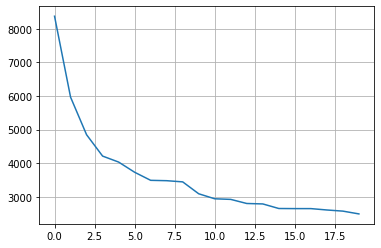

In [ ]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

In [ ]:
n_categorical = 10
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

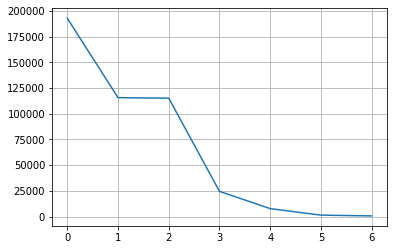

In [ ]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 3
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

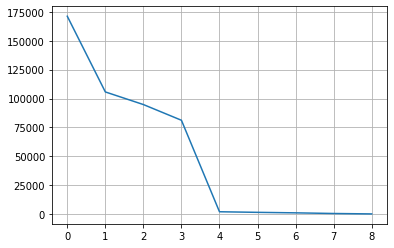

In [ ]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 4
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

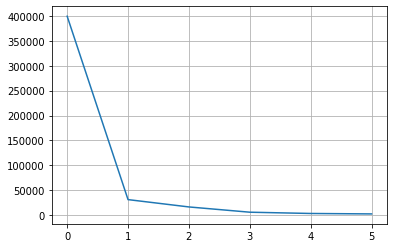

In [ ]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 3
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

gas       399399
diesel     31077
other      16359
others      8141
Name: fuel, dtype: int64

In [ ]:
df.loc[df[col] == 'other', col] = 'others'

In [ ]:
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

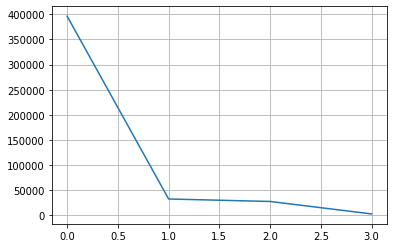

In [ ]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 3
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

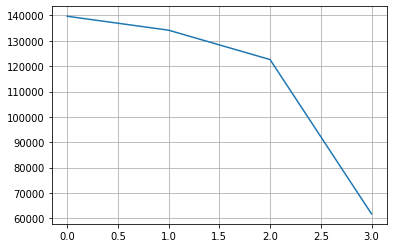

In [ ]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
df[col].fillna('others', inplace=True)

In [ ]:
df[col].value_counts()

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64

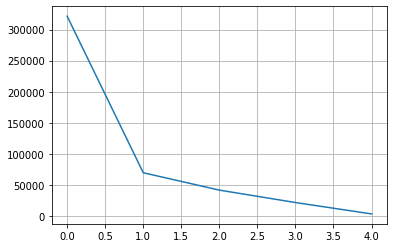

In [ ]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts) 

In [ ]:
n_categorical = 2
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)

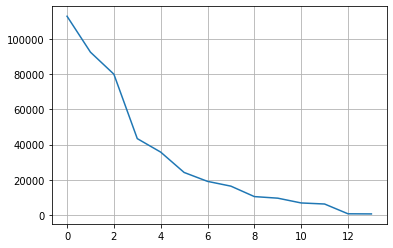

In [ ]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts) 

In [ ]:
n_categorical = 8
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

sedan        92364
SUV          79882
pickup       43343
truck        35694
others       34538
other        24160
coupe        19106
hatchback    16388
Name: type, dtype: int64

In [ ]:
df.loc[df[col] == 'other', col] = 'others'

In [ ]:
df[col].fillna('others', inplace=True)

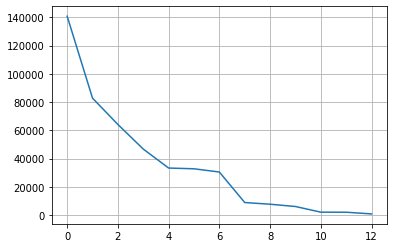

In [ ]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts) 

In [ ]:
n_categorical = 7
others = counts.index[n_categorical:] 
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [ ]:
df.loc[df[col] == 'other', col] = 'others'

In [ ]:
df[col].fillna('others', inplace=True)

#### 수치형데이터 클리닝

In [ ]:
p1 = df['price'].quantile(0.99) # 상위 1%
p2 = df['price'].quantile(0.1) # 하위 10%
print(p1, p2)
# 아웃라이어 제거

59900.0 651.0


In [ ]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [ ]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

272803.10999999824 18593.0


In [ ]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [ ]:
df.describe()

,price,odometer,age
count,322166.000000,322166.000000,321666.000000
mean,15211.239072,103341.828089,10.220235
std,11248.543565,55049.524247,7.071633
min,652.000000,18596.000000,0.000000
25%,6500.000000,57454.000000,6.000000
50%,12000.000000,98850.000000,9.000000
75%,20990.000000,141000.000000,13.000000
max,59895.000000,272742.000000,121.000000


In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

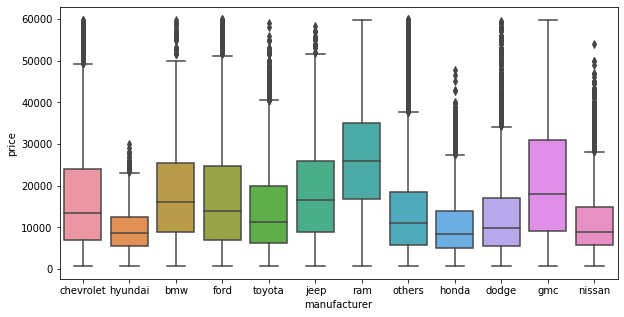

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df)

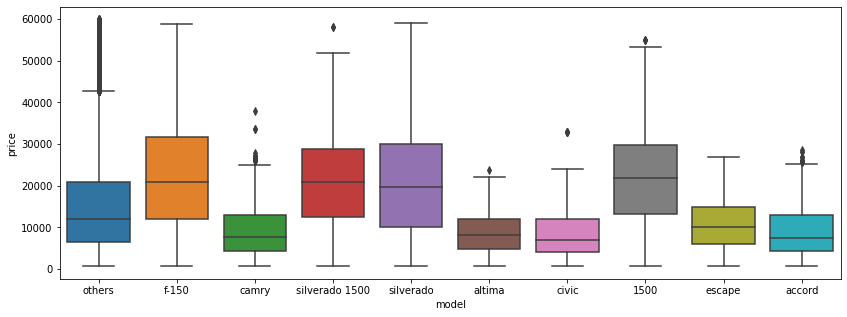

In [ ]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='model', y='price', data=df)

#### 칼럽간의 히트맵 시각화

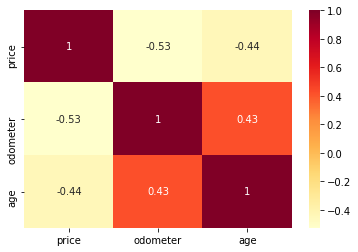

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

### Step 2. 모델 학습을 위한 전처리

#### MinMaxScaler를 이용해 수치형 데이터 표준화하기

In [ ]:


X_num = df[['odometer', 'age']]

scaler = MinMaxScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat) 

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [ ]:
X.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_bmw,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_others,transmission_automatic,transmission_manual,transmission_other,transmission_others,drive_4wd,drive_fwd,drive_others,drive_rwd,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,0.055661,0.090909,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.295122,0.057851,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0.269333,0.123967,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.674431,0.388430,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.383260,0.132231,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
X.shape

(322166, 64)

In [ ]:
X.isna().sum()

odometer                 0
age                    500
region_columbus          0
region_fayetteville      0
region_jacksonville      0
                      ... 
paint_color_grey         0
paint_color_others       0
paint_color_red          0
paint_color_silver       0
paint_color_white        0
Length: 64, dtype: int64

In [ ]:
 # X['age'].mean()을 보면, 2.3403839e-15 스케일링을 해줘서, 거의 0이다. 그래서 그냥 0으로 바꿔줌.
 X.fillna(0.0, inplace=True)

In [ ]:
X.isna().sum()

odometer               0
age                    0
region_columbus        0
region_fayetteville    0
region_jacksonville    0
                      ..
paint_color_grey       0
paint_color_others     0
paint_color_red        0
paint_color_silver     0
paint_color_white      0
Length: 64, dtype: int64

#### 학습데이터와 테스트데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### PCA를 이용해 데이터 전처리 수행하기

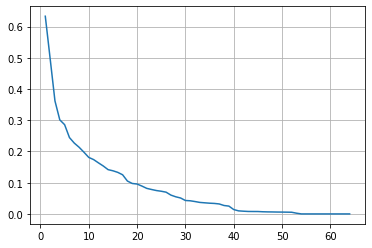

In [ ]:
pca = PCA()
pca.fit(X_train)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.grid()

In [ ]:
# 30에서 끊어준다.
pca = PCA(n_components=30)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)



### Step 3. Regression 모델 학습하기(y : 회귀유형)

-  데이터가 크기 때문에 LGBM만 하이퍼파라미터 조절을 통해 분석해본다.

In [ ]:
from lightgbm import LGBMRegressor as LGBM_R
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

#### 파라미터 그리드 설계

In [ ]:
# 모델 파라미터 그리드 설계
# 키가 모델의 함수, 값이 파라미터 그리드의 값
param_grid = dict() 

param_grid_for_LGBM_R = ParameterGrid({"max_depth": [2, 3, 4],
                                      "n_estimators": [50, 100],
                                      "learning_rate": [0.05, 0.1, 0.15, 0.2]})

param_grid[LGBM_R] = param_grid_for_LGBM_R


# 출력을 위한 max_iter_num 계산 
                            
# 튜닝 시작
best_score = 9999999999 
iteration_num = 0    
for k in range(30, 5, -1): 
    print(k)
  
    for model_func in [LGBM_R]:
        for param in param_grid[model_func]:
            model = model_func(**param).fit(pca.transform(X_train), y_train)
            y_pred = model.predict(pca.transform(X_test))
            score = MAE(y_test, y_pred)
            if score < best_score:
                best_model_func = model_func
                best_score = score
                best_parameter = param
            iteration_num += 1      


print("모델:", best_model_func)
print("점수:", best_score)
print("파라미터:", best_parameter)       

30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
모델: <class 'lightgbm.sklearn.LGBMRegressor'>
점수: 6356.085916135081
파라미터: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}


In [ ]:
final_model_lgbm = LGBM_R(max_depth=4, n_estimators=100,learning_rate=0.2)
final_model_lgbm.fit(pca.transform(X_train), y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred = final_model_lgbm.predict(pca.transform(X_test))
print(MAE(y_test, pred))
print(sqrt(MSE(y_test, pred)))

4821.085579763152
6719.608121610891


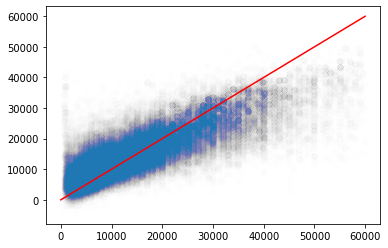

In [ ]:
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,60000], [0,60000], 'r-')

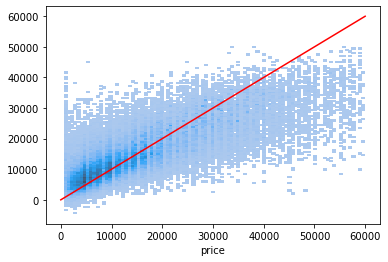

In [ ]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60000], [0, 60000], 'r-')

#### 에러 값의 히스토그램 확인하기

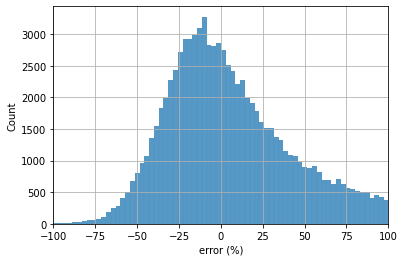

In [ ]:
# 에러율의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100 
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()

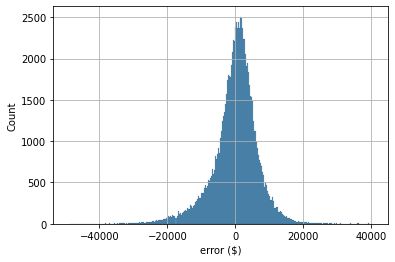

In [ ]:
err = (pred - y_test)
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()  

### Step 4. 딥러닝.신경망 모델로 분석

In [ ]:
from keras.optimizers import Adam

In [ ]:
print(X_train.shape, y_train.shape)

(225516, 64) (225516,)


In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(225516, 30)

#### 모델구현

In [ ]:
    model = models.Sequential()
    model.add(layers.Dense(16, activation='linear',input_shape=(30,)))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
# 콜백 함수 적용 부분(분류모델은 val_loss로)
early_stopping_callback = EarlyStopping(monitor='loss', mode='min', patience=10)
# 분류모델이면 model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/practice/분류문제/문제6_딥러닝파라미터/{epoch}-{loss:.2f}.h5', 
                                   monitor='loss', save_best_only=True, verbose=1)


history = model.fit(X_train, y_train, batch_size=128,  epochs=50,
            callbacks=[early_stopping_callback, model_checkpoint],
            validation_data=(X_test, y_test))

Epoch 1/50
1762/1762 [==============================] - 7s 4ms/step - loss: 55215904.0000 - mae: 5416.9277 - val_loss: 51131952.0000 - val_mae: 5152.1587

Epoch 00001: loss improved from inf to 55215904.00000, saving model to /content/drive/MyDrive/Colab Notebooks/practice/분류문제/문제6_딥러닝파라미터/1-55215904.00.h5
Epoch 2/50
1762/1762 [==============================] - 7s 4ms/step - loss: 47599924.0000 - mae: 4904.4253 - val_loss: 46161224.0000 - val_mae: 4778.0283

Epoch 00002: loss improved from 55215904.00000 to 47599924.00000, saving model to /content/drive/MyDrive/Colab Notebooks/practice/분류문제/문제6_딥러닝파라미터/2-47599924.00.h5
Epoch 3/50
1762/1762 [==============================] - 7s 4ms/step - loss: 42957800.0000 - mae: 4573.6221 - val_loss: 40646900.0000 - val_mae: 4392.7554

Epoch 00003: loss improved from 47599924.00000 to 42957800.00000, saving model to /content/drive/MyDrive/Colab Notebooks/practice/분류문제/문제6_딥러닝파라미터/3-42957800.00.h5


#### 딥러닝 모델평가

In [ ]:
model.evaluate(X_test, y_test)

3021/3021 [==============================] - 5s 2ms/step - loss: 36306040.0000 - mae: 4182.6978


[36306040.0, 4182.69775390625]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
print(model.predict(X_test[5:10]))
print(y_test[5:10])

[[ 5891.446]
 [ 9238.527]
 [17666.47 ]
 [10415.357]
 [27513.326]]
221705     7500
309804    10800
147525    15196
96013     18998
329641    15999
Name: price, dtype: int64


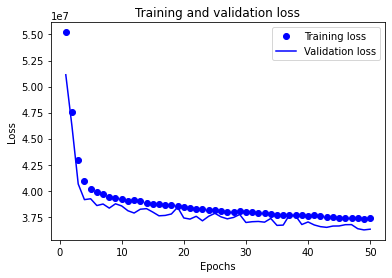

In [ ]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

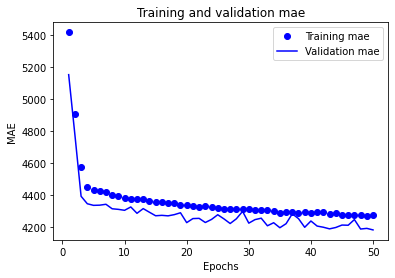

In [ ]:
plt.clf()   # 그래프를 초기화합니다
mae = history.history['mae'] 
val_mae = history.history['val_mae'] 

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()